In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
from helpers import *
import torch.nn.functional as F
import pandas as pd

%reload_ext autoreload
%autoreload 2

Solution to problem 3

In [33]:
df_train = pd.read_csv('../data/cleveland_heart_train.csv')
df_test = pd.read_csv('../data/cleveland_heart_test.csv')
df_train.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,presence
0,148,41,Male,Cleveland,non-anginal,112,250,False,normal,179,False,0.0,upsloping,0,normal,0,0
1,245,60,Female,Cleveland,non-anginal,120,178,True,normal,96,False,0.0,upsloping,0,normal,0,0
2,49,65,Female,Cleveland,non-anginal,140,417,True,lv hypertrophy,157,False,0.8,upsloping,1,normal,0,0
3,213,41,Male,Cleveland,non-anginal,130,214,False,lv hypertrophy,168,False,2.0,flat,0,normal,0,0
4,153,67,Female,Cleveland,non-anginal,115,564,False,lv hypertrophy,160,False,1.6,flat,0,reversable defect,0,0


In [34]:
# select columns chol, 
feature_cols = ['chol', 'age','trestbps','thalch','ca']
y_col = 'presence'
X_train = torch.tensor(df_train[feature_cols].to_numpy()).float()
y_train =  torch.tensor(df_train[y_col].to_numpy()).float()
X_test =  torch.tensor(df_test[feature_cols].to_numpy()).float()
y_test =  torch.tensor(df_test[y_col].to_numpy()).float()


44.28518909226597 0.35135135


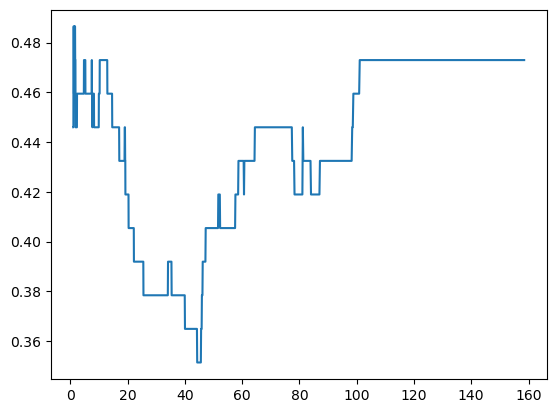

In [35]:
from models import NW

h_vec = np.logspace(0, 2.2, 2500)
test_err = []
for h in h_vec:
    model = NW(X_train, y_train, h=h)
    prob = model(X_test)
    test_err.append(((prob > 0.5).float() != y_test).float().mean())

plt.plot(h_vec, test_err)
#plt.xscale('log')
# print the best h and the corresponding test error
print(h_vec[np.argmin(test_err)], np.min(test_err))

Solutions to part (a) and (b) of problem 2

In [37]:
# Find the majority rule classifier
# majority rule classifier is the one that predicts the majority class
majority_decision = (y_train.mean() > 0.5).float().item()

# Calculate the training and test error for the best majority rule classifier
train_err = ((y_train != majority_decision).float().mean()).item()
test_err = ((y_test != majority_decision).float().mean()).item()

# Print the two errors up to 3 digit precision
print(f'Train error: {train_err:.3f}')
print(f'Test error: {test_err:.3f}')

Train error: 0.457
Test error: 0.473


In [45]:
# Find the average of the presence column over values of cp column in df_train
# and store the result in a variable called cp_avg
cp_avg = df_train.groupby('cp')['presence'].mean()

print(cp_avg)    

# The plugin optimal rule is the following
(cp_avg > 0.5)*1

cp
asymptomatic       0.701923
atypical angina    0.214286
non-anginal        0.233333
typical angina     0.352941
Name: presence, dtype: float64


cp
asymptomatic       1
atypical angina    0
non-anginal        0
typical angina     0
Name: presence, dtype: int64